In [1]:
import solver
import numpy as np

## Generalized PA equation

This solver implements the generalized PA equation

 $$N_k(t+1) = N_k(t) + B\delta_{k,1} + \frac{G}{(B+G)t + K_0} [(k-1)N_{k-1}(t) - k N_k(t)],$$
 
where $N_k(t)$ counts the number of elements with $k$ shares of the total resource $K(t)=t + K_0$ at time $t$, where $B$ is the birth rate and $G$ is the growth rate.

This equation works for abritrary $B,G,K_0$.
So we can test the equation right away, starting from the condition $N_0(t=0)=0$ and $N_1(t=0)=1$.

In [2]:
state = np.array([0, 1])
birth_rate = 2
growth_rate = 1
for t in range(1, 10):
    state = solver.update_preferential_attachment(state, birth_rate, growth_rate, t)

Let's plot the (unormalized) mean field solution after 10 time steps.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns  # for style, comment if unavailable
%matplotlib inline
sns.set_style('ticks')

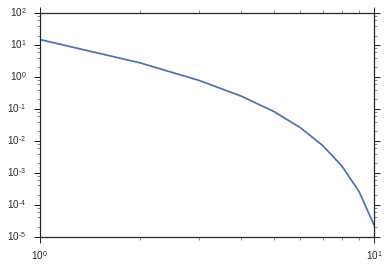

In [4]:
plt.loglog(state)

And a few more iterations will allows us to converge nicely

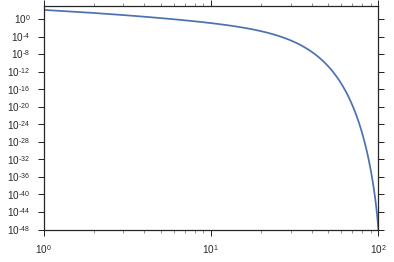

In [5]:
for t in range(10, 100):
    state = solver.update_preferential_attachment(state, birth_rate, growth_rate, t)

plt.loglog(state);

## Automated rate computation

Now, the interesting part of the `solver` module is all the birth / growth computations.

For example, if we have a $d=3$ HPA structure with the parameters used in Fig. 4 of Hébert-Dufresne et al. PRE 92, 062809 (2016), $\vec{p} = (0, 0.0005, 0.185, 0.385, 0)$ and $\vec{q} = (0.8, 0.6, 0.5, 1, 0)$, then the structural / nodal rates of growh / birth are immediately given by the module:

In [6]:
p = np.array([0, 0.0005, 0.185, 0.385, 1])
q = np.array([0.80, 0.60, 0.50, 1, 0])


sb = solver.get_sb(p)
sg = solver.get_sg(p)
q_prime = solver.get_q_prime(q, sb, sg)
r = solver.get_r(q_prime, p)
ng = solver.get_ng(r)
nb = solver.get_nb(r, q)

print("Structural birth rate\n", sb)
print("Structural growth rate\n", sg)
print("Nodal birth rate\n", nb)
print("Nodal growth rate\n", ng)

Structural birth rate
 [  0.00000000e+00   5.00000000e-04   1.85407500e-01   4.99025612e-01
   1.00000000e+00]
Structural growth rate
 [  5.00000000e-04   1.84907500e-01   3.13618112e-01   5.00974388e-01
   0.00000000e+00]
Nodal birth rate
 [ 0.37428703  0.37428703  0.37428703  0.37428703  0.37428703]
Nodal growth rate
 [ 0.          0.09357176  0.40426884  0.62571297  0.62571297]


## Complete HPA solutions

The above rates can be We can solve the generalized PA equations for level $k=1,2,3$ separately and re-obtain Fig.4.

In [7]:
init = np.array([0,1])
n  = [init.copy() for i in range(3)]
s  = [init.copy() for i in range(3)]
t_max = 1000

for t in range(1, t_max):
    for k in [1, 2, 3]:
        s[k - 1] = solver.update_preferential_attachment(s[k - 1], sb[k], sg[k], t)
        n[k - 1] = solver.update_preferential_attachment(n[k - 1], nb[k], ng[k], t)

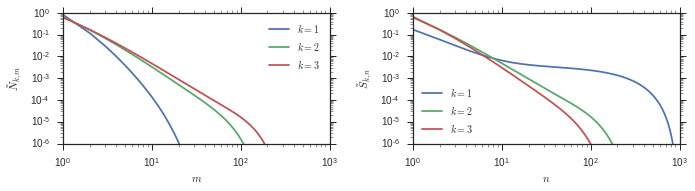

In [8]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
for k in [1,2,3]:
    plt.loglog(n[k - 1] / sum(n[k - 1]), label="$k=" + str(k) + "$")
plt.xlabel('$m$')
plt.ylabel('$\\tilde{N}_{k,m}$')
plt.ylim(1e-6,1)
plt.legend(loc=1)

plt.subplot(1,2,2)
for k in [1,2,3]:
    plt.loglog(s[k - 1] / sum(s[k - 1]), label="$k=" + str(k) + "$")
plt.xlabel('$n$')
plt.ylabel('$\\tilde{S}_{k,n}$')
plt.ylim(1e-6,1)
plt.legend(loc=3)

plt.tight_layout(pad=2)

Et *voilà*!

For ease of use, we also provide wrapper functions that perform all the computations at once.
The first is a function that computes all the birth / growth rates.

In [9]:
(sb, sg, ng, nb) = solver.get_all_rates(p, q)
print("Structural birth rate\n", sb)
print("Structural growth rate\n", sg)
print("Nodal birth rate\n", nb)
print("Nodal growth rate\n", ng)

Structural birth rate
 [  0.00000000e+00   5.00000000e-04   1.85407500e-01   4.99025612e-01
   1.00000000e+00]
Structural growth rate
 [  5.00000000e-04   1.84907500e-01   3.13618112e-01   5.00974388e-01
   0.00000000e+00]
Nodal birth rate
 [ 0.37428703  0.37428703  0.37428703  0.37428703  0.37428703]
Nodal growth rate
 [ 0.          0.09357176  0.40426884  0.62571297  0.62571297]


And the second iterates depth $d$ system of equations for the user.

In [10]:
n, s = solver.solve_hpa(p, q, 100)

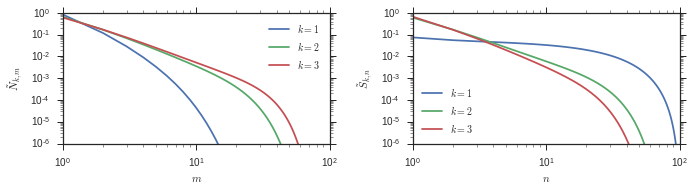

In [11]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
for k in [1,2,3]:
    plt.loglog(n[k - 1] / sum(n[k - 1]), label="$k=" + str(k) + "$")
plt.xlabel('$m$')
plt.ylabel('$\\tilde{N}_{k,m}$')
plt.ylim(1e-6,1)
plt.legend(loc=1)

plt.subplot(1,2,2)
for k in [1,2,3]:
    plt.loglog(s[k - 1] / sum(s[k - 1]), label="$k=" + str(k) + "$")
plt.xlabel('$n$')
plt.ylabel('$\\tilde{S}_{k,n}$')
plt.ylim(1e-6,1)
plt.legend(loc=3)

plt.tight_layout(pad=2)

This would be what the system looks like after 100 iterations instead of 1000.